In [74]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from utils.rboxs_utils import poly_filter, poly2rbox, poly2rbox_order
import warnings
warnings.simplefilter('ignore')

In [2]:
dataset_folder = './dataset/dataset_inhouse_phantom/'

In [3]:
# rboxes, csl_labels, tl_labels = poly2rbox_order(polys=labels[:, 1:],
#                                num_cls_thata=hyp['cls_theta'] if hyp else 180,
#                                radius=hyp['csl_radius'] if hyp else 6.0,
#                                use_pi=True, use_gaussian=True)

In [72]:
train_folder_path = os.path.join(dataset_folder, 'train/labelTxt/*.txt')
train_files = glob.glob(train_folder_path)
val_folder_path = os.path.join(dataset_folder, 'val/labelTxt/*.txt')
val_files = glob.glob(val_folder_path)
train_val_folder_path = os.path.join(dataset_folder, '*/labelTxt/*.txt')
train_val_files = glob.glob(train_val_folder_path)

In [73]:
len(train_files), len(val_files), len(train_val_files)

(3975, 429, 4404)

In [6]:
sample_index = 0

In [12]:
labels = pd.read_table(train_files[sample_index], header=None, sep=' ')
labels

,0,1,2,3,4,5,6,7,8,9
0,404,588,439,745,0,845,0,679,tool3s,0
1,905,552,923,701,394,765,377,616,tool3m,0
2,613,398,551,327,745,160,806,231,tool4m,0
3,810,267,706,87,855,0,1264,3,tool4s,0


In [52]:
name_to_ind = {'tool1s': 0, 'tool1m': 1, 'tool2s': 2, 'tool2m': 3, 'tool3s': 4, 'tool3m': 5, 
               'tool4s': 6, 'tool4m': 7, 'tool5s': 8, 'tool5m': 9, 'tool6s': 10, 'tool6m': 11, 
               'tool7s': 12, 'tool7m': 13}

# NOTE: we can modify the toolxs into the specific instrument catory
ind_to_name = {0: 'tool1s', 1: 'tool1m', 2: 'tool2s', 3: 'tool2m', 4: 'tool3s', 5: 'tool3m', 
               6: 'tool4s', 7: 'tool4m', 8: 'tool5s', 9: 'tool5m', 10: 'tool6s', 11: 'tool6m',
               12: 'tool7s', 13: 'tool7m'}

In [30]:
polys = np.array(labels.iloc[:, :8])
tool_type = np.array(labels[8].map(name_to_ind)).reshape(-1,1)

In [34]:
polys, tool_type, (905 + 923+394+377)/4

(array([[ 404,  588,  439,  745,    0,  845,    0,  679],
        [ 905,  552,  923,  701,  394,  765,  377,  616],
        [ 613,  398,  551,  327,  745,  160,  806,  231],
        [ 810,  267,  706,   87,  855,    0, 1264,    3]]),
 array([[4],
        [5],
        [7],
        [6]]),
 649.75)

In [32]:
polys_category = np.hstack((tool_type, polys))

In [37]:
# rboxes (array):
# csl_labels (array): (num_gts, num_cls_thata)
# topleft_labels (array): (num_gts, num_topleft_order)
rboxes, csl_labels, topleft_labels = poly2rbox_order(polys=polys_category[:,1:],
                                                     num_cls_thata=180,
                                                     radius=6.0,
                                                     use_pi=True, use_gaussian=True)

In [39]:
rboxes, polys_category[:,0]

(array([[2.01999924e+02, 7.16499939e+02, 4.50599182e+02, 1.61942642e+02,
         2.21549923e-01],
        [6.49500061e+02, 6.58500061e+02, 5.32883667e+02, 1.50083282e+02,
         1.20397893e-01],
        [6.78746948e+02, 2.79217957e+02, 2.55978500e+02, 9.42579117e+01,
         7.10744683e-01],
        [9.84672363e+02, 4.50121460e+01, 5.25178101e+02, 2.08192245e+02,
         5.26703845e-01]]),
 array([4, 5, 7, 6]))

In [50]:
pd_rboxes = pd.DataFrame(rboxes)
pd_rboxes['category_ind'] = pd.DataFrame(polys_category[:,0])
pd_rboxes['category'] = pd_rboxes['category_ind'].map(ind_to_name)
pd_rboxes

,0,1,2,3,4,category_ind,category
0,201.999924,716.499939,450.599182,161.942642,0.221550,4,tool3s
1,649.500061,658.500061,532.883667,150.083282,0.120398,5,tool3m
2,678.746948,279.217957,255.978500,94.257912,0.710745,7,tool4m
3,984.672363,45.012146,525.178101,208.192245,0.526704,6,tool4s


# load a txt and transfer into a dataframe for further processing

In [66]:
sample_index = 10
labels = pd.read_table(train_files[sample_index], header=None, sep=' ')
name_to_ind = {'tool1s': 0, 'tool1m': 1, 'tool2s': 2, 'tool2m': 3, 'tool3s': 4, 'tool3m': 5, 
               'tool4s': 6, 'tool4m': 7, 'tool5s': 8, 'tool5m': 9, 'tool6s': 10, 'tool6m': 11, 
               'tool7s': 12, 'tool7m': 13}

# NOTE: we can modify the toolxs into the specific instrument catory
ind_to_name = {0: 'tool1s', 1: 'tool1m', 2: 'tool2s', 3: 'tool2m', 4: 'tool3s', 5: 'tool3m', 
               6: 'tool4s', 7: 'tool4m', 8: 'tool5s', 9: 'tool5m', 10: 'tool6s', 11: 'tool6m',
               12: 'tool7s', 13: 'tool7m'}

polys = np.array(labels.iloc[:, :8])
tool_type = np.array(labels[8].map(name_to_ind)).reshape(-1,1)
polys_category = np.hstack((tool_type, polys))

rboxes, csl_labels, topleft_labels = poly2rbox_order(polys=polys_category[:,1:],
                                                     num_cls_thata=180,
                                                     radius=6.0,
                                                     use_pi=True, use_gaussian=True)

pd_rboxes1 = pd.DataFrame(rboxes)
pd_rboxes1['category_ind'] = pd.DataFrame(polys_category[:,0])
pd_rboxes1['category'] = pd_rboxes1['category_ind'].map(ind_to_name)

pd_rboxes1

,0,1,2,3,4,category_ind,category
0,954.041382,37.019897,783.604431,295.194824,-0.448808,2,tool2s
1,1430.000000,337.500061,416.225952,245.203888,-0.638693,3,tool2m
2,1707.442383,631.288452,446.556427,178.465683,-0.197396,5,tool3m


In [71]:
train_files

['./dataset/dataset_inhouse_phantom/train/labelTxt/421801.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/7010702.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/421601.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/1040311.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/310904.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/110207.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/000187.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/231002.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/7010507.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/241605.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/271606.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/5180201.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/000445.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/321501.txt',
 './dataset/dataset_inhouse_phantom/train/labelTxt/120501.txt',
 './dataset/dataset_inhouse_phantom/

In [254]:
topleft_labels, rboxes, np.argmax(topleft_labels, axis=1)

(array([[0., 1., 0., 0.],
        [0., 1., 0., 0.]]),
 array([[1.48700000e+03, 7.80000000e+01, 3.92655121e+02, 1.40292542e+02,
         1.35413058e-01],
        [1.72050000e+03, 5.70000000e+01, 2.15000000e+02, 1.14000000e+02,
         0.00000000e+00]]),
 array([1, 1]))

In [257]:
sample_index = 10
name_to_ind = {'tool1s': 0, 'tool1m': 1, 'tool2s': 2, 'tool2m': 3, 'tool3s': 4, 'tool3m': 5, 
               'tool4s': 6, 'tool4m': 7, 'tool5s': 8, 'tool5m': 9, 'tool6s': 10, 'tool6m': 11, 
               'tool7s': 12, 'tool7m': 13}

# NOTE: we can modify the toolxs into the specific instrument catory
ind_to_name = {0: 'tool1s', 1: 'tool1m', 2: 'tool2s', 3: 'tool2m', 4: 'tool3s', 5: 'tool3m', 
               6: 'tool4s', 7: 'tool4m', 8: 'tool5s', 9: 'tool5m', 10: 'tool6s', 11: 'tool6m',
               12: 'tool7s', 13: 'tool7m'}
pd_rboxes = None
for sample_index in range(len(train_val_files)): # len(train_val_files)
    labels = pd.read_table(train_val_files[sample_index], header=None, sep=' ')

    polys = np.array(labels.iloc[:, :8])
    tool_type = np.array(labels[8].map(name_to_ind)).reshape(-1,1)
    polys_category = np.hstack((tool_type, polys))

    rboxes, csl_labels, topleft_labels = poly2rbox_order(polys=polys_category[:,1:],
                                                         num_cls_thata=180,
                                                         radius=6.0,
                                                         use_pi=True, use_gaussian=True)

    if pd_rboxes is None:
        pd_rboxes = pd.DataFrame(rboxes)
        pd_rboxes['category_ind'] = pd.DataFrame(polys_category[:,0])
        pd_rboxes['topleft_ind'] = pd.DataFrame(np.argmax(topleft_labels, axis=1))
        pd_rboxes['category'] = pd_rboxes['category_ind'].map(ind_to_name)
    else:
        pd_rboxes_ = pd.DataFrame(rboxes)
        pd_rboxes_['category_ind'] = pd.DataFrame(polys_category[:,0])
        pd_rboxes_['topleft_ind'] = pd.DataFrame(np.argmax(topleft_labels, axis=1))
        pd_rboxes_['category'] = pd_rboxes_['category_ind'].map(ind_to_name)
        pd_rboxes = pd_rboxes.append(pd_rboxes_)
pd_rboxes

,0,1,2,3,4,category_ind,topleft_ind,category
0,1084.000000,842.000061,519.765137,327.963745,1.433532,3,3,tool2m
0,1355.000122,700.500000,265.774353,122.036850,0.989057,5,3,tool3m
1,1166.499878,964.999939,441.689056,150.145584,0.838318,4,3,tool3s
0,256.500061,762.000000,303.606964,239.640945,0.119036,3,1,tool2m
1,1138.000488,585.069519,1559.011353,798.005554,0.003759,2,1,tool2s
...,...,...,...,...,...,...,...,...
1,488.999939,952.999939,808.468933,243.495300,0.320968,6,3,tool4s
0,564.000000,556.999939,1127.999756,875.999878,0.000000,3,3,tool2m
1,1601.000122,546.000000,752.121704,284.381683,0.296934,1,1,tool1m
0,1487.000000,78.000000,392.655121,140.292542,0.135413,9,1,tool5m


In [172]:
# pd_rboxes.append(pd_rboxes1)

In [173]:
pd_rboxes['theta'] = pd_rboxes.iloc[:,4]
pd_rboxes

,0,1,2,3,4,category_ind,category,theta
0,1084.000000,842.000061,519.765137,327.963745,1.433532,3,tool2m,1.433532
0,1355.000122,700.500000,265.774353,122.036850,0.989057,5,tool3m,0.989057
1,1166.499878,964.999939,441.689056,150.145584,0.838318,4,tool3s,0.838318
0,256.500061,762.000000,303.606964,239.640945,0.119036,3,tool2m,0.119036
1,1138.000488,585.069519,1559.011353,798.005554,0.003759,2,tool2s,0.003759
...,...,...,...,...,...,...,...,...
1,488.999939,952.999939,808.468933,243.495300,0.320968,6,tool4s,0.320968
0,564.000000,556.999939,1127.999756,875.999878,0.000000,3,tool2m,0.000000
1,1601.000122,546.000000,752.121704,284.381683,0.296934,1,tool1m,0.296934
0,1487.000000,78.000000,392.655121,140.292542,0.135413,9,tool5m,0.135413


In [174]:
pd_rboxes['pixels'] = pd_rboxes.iloc[:,2] * pd_rboxes.iloc[:,3]
pd_rboxes

,0,1,2,3,4,category_ind,category,theta,pixels
0,1084.000000,842.000061,519.765137,327.963745,1.433532,3,tool2m,1.433532,1.704641e+05
0,1355.000122,700.500000,265.774353,122.036850,0.989057,5,tool3m,0.989057,3.243426e+04
1,1166.499878,964.999939,441.689056,150.145584,0.838318,4,tool3s,0.838318,6.631766e+04
0,256.500061,762.000000,303.606964,239.640945,0.119036,3,tool2m,0.119036,7.275666e+04
1,1138.000488,585.069519,1559.011353,798.005554,0.003759,2,tool2s,0.003759,1.244100e+06
...,...,...,...,...,...,...,...,...,...
1,488.999939,952.999939,808.468933,243.495300,0.320968,6,tool4s,0.320968,1.968584e+05
0,564.000000,556.999939,1127.999756,875.999878,0.000000,3,tool2m,0.000000,9.881276e+05
1,1601.000122,546.000000,752.121704,284.381683,0.296934,1,tool1m,0.296934,2.138896e+05
0,1487.000000,78.000000,392.655121,140.292542,0.135413,9,tool5m,0.135413,5.508658e+04


In [175]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [176]:
pd_rboxes.shape[0]

11313

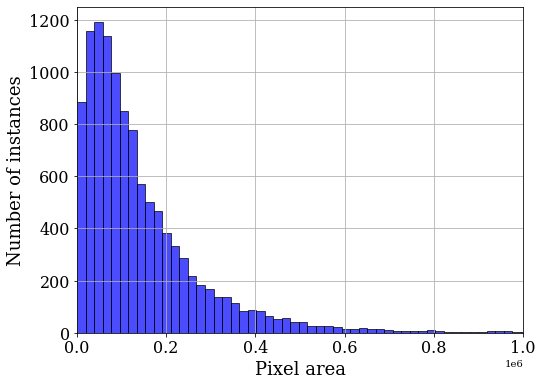

In [209]:
plt.figure(figsize=(8,6))
# plt.bar(range(pd_rboxes.shape[0]), )
plt.hist(pd_rboxes['pixels'], bins=100, facecolor="blue", edgecolor="black", alpha=0.7, label='sizes')

plt.xlim([0, 1e6])
plt.ticklabel_format(style='sci', scilimits=(0,1), axis='x')
plt.xticks(np.arange(0, 1.1e6, 2e5),size = 16)
plt.yticks(size = 16)
plt.grid()
plt.xlabel('Pixel area', size = 18)
plt.ylabel('Number of instances', size = 18)

plt.savefig('./dataset/statistics_imgs/instance_pixels.png', dpi=600, pad_inches=0)

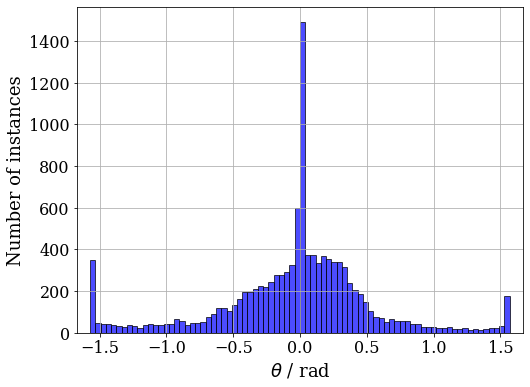

In [207]:
plt.figure(figsize=(8,6))
# plt.bar(range(pd_rboxes.shape[0]), )
plt.hist(pd_rboxes['theta'], bins=80, facecolor="blue", edgecolor="black", alpha=0.7, label='sizes')

plt.xlim([-np.pi/2-0.1, np.pi/2+0.1])
plt.ticklabel_format(style='sci', scilimits=(0,1), axis='x')
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.grid()
plt.xlabel('$\\theta$ / rad', size = 18)
plt.ylabel('Number of instances', size = 18)

plt.savefig('./dataset/statistics_imgs/instance_theta.png', dpi=600, pad_inches=0)

In [185]:
# plt.figure(figsize=(8,6))
# plt.bar(pd_rboxes['category'], pd_rboxes['pixels'])
# # plt.hist(pd_rboxes['theta'], bins=80, facecolor="blue", edgecolor="black", alpha=0.7, label='sizes')

# # plt.xlim([-np.pi/2-0.1, np.pi/2+0.1])
# # plt.ticklabel_format(style='sci', scilimits=(0,1), axis='x')
# plt.xticks(rotation=45, ha='right', size = 16)
# plt.yticks(size = 16)
# # plt.grid()
# # plt.xlabel('#radians', size = 18)
# plt.ylabel('#Instances', size = 18)

In [186]:
pd_rboxes_tool1m = pd_rboxes[pd_rboxes['category'] == 'tool1m']
pd_rboxes_tool2m = pd_rboxes[pd_rboxes['category'] == 'tool2m']
pd_rboxes_tool3m = pd_rboxes[pd_rboxes['category'] == 'tool3m']
pd_rboxes_tool4m = pd_rboxes[pd_rboxes['category'] == 'tool4m']
pd_rboxes_tool5m = pd_rboxes[pd_rboxes['category'] == 'tool5m']
pd_rboxes_tool6m = pd_rboxes[pd_rboxes['category'] == 'tool6m']
pd_rboxes_tool7m = pd_rboxes[pd_rboxes['category'] == 'tool7m']

pd_rboxes_tool1s = pd_rboxes[pd_rboxes['category'] == 'tool1s']
pd_rboxes_tool2s = pd_rboxes[pd_rboxes['category'] == 'tool2s']
pd_rboxes_tool3s = pd_rboxes[pd_rboxes['category'] == 'tool3s']
pd_rboxes_tool4s = pd_rboxes[pd_rboxes['category'] == 'tool4s']
pd_rboxes_tool5s = pd_rboxes[pd_rboxes['category'] == 'tool5s']
pd_rboxes_tool6s = pd_rboxes[pd_rboxes['category'] == 'tool6s']
pd_rboxes_tool7s = pd_rboxes[pd_rboxes['category'] == 'tool7s']

In [187]:
pd_rboxes_tool1m_pixels = pd_rboxes_tool1m['pixels']
pd_rboxes_tool2m_pixels = pd_rboxes_tool2m['pixels']
pd_rboxes_tool3m_pixels = pd_rboxes_tool3m['pixels']
pd_rboxes_tool4m_pixels = pd_rboxes_tool4m['pixels']
pd_rboxes_tool5m_pixels = pd_rboxes_tool5m['pixels']
pd_rboxes_tool6m_pixels = pd_rboxes_tool6m['pixels']
pd_rboxes_tool7m_pixels = pd_rboxes_tool7m['pixels']

pd_rboxes_tool1s_pixels = pd_rboxes_tool1s['pixels']
pd_rboxes_tool2s_pixels = pd_rboxes_tool2s['pixels']
pd_rboxes_tool3s_pixels = pd_rboxes_tool3s['pixels']
pd_rboxes_tool4s_pixels = pd_rboxes_tool4s['pixels']
pd_rboxes_tool5s_pixels = pd_rboxes_tool5s['pixels']
pd_rboxes_tool6s_pixels = pd_rboxes_tool6s['pixels']
pd_rboxes_tool7s_pixels = pd_rboxes_tool7s['pixels']

# merge 4 + 7
pd_rboxes_tool47m_pixels = pd_rboxes_tool4m_pixels.append(pd_rboxes_tool7m_pixels)
pd_rboxes_tool47s_pixels = pd_rboxes_tool4s_pixels.append(pd_rboxes_tool7s_pixels)

In [188]:
# pd_rboxes_tool4m_pixels.append(pd_rboxes_tool7m_pixels)

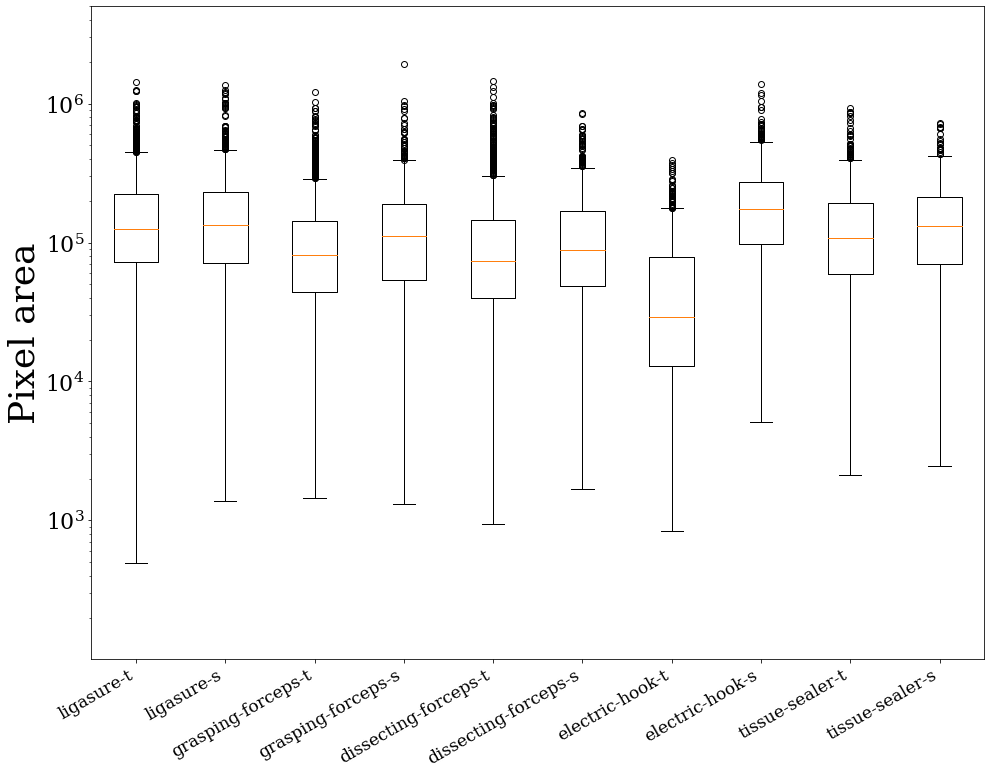

In [222]:
plt.figure(figsize=(16,12))
labels = 'ligasure-t', 'ligasure-s', 'grasping-forceps-t', 'grasping-forceps-s', 'dissecting-forceps-t', 'dissecting-forceps-s', 'electric-hook-t', 'electric-hook-s', 'tissue-sealer-t', 'tissue-sealer-s'
plt.boxplot([pd_rboxes_tool2m_pixels, pd_rboxes_tool2s_pixels, pd_rboxes_tool1m_pixels, pd_rboxes_tool1s_pixels, 
             pd_rboxes_tool3m_pixels,pd_rboxes_tool3s_pixels, pd_rboxes_tool47m_pixels, pd_rboxes_tool47s_pixels,
             pd_rboxes_tool5m_pixels, pd_rboxes_tool5s_pixels], labels=labels)
plt.yscale('log')
plt.xticks(rotation=30, ha='right', size = 17)
plt.yticks(size = 22)
plt.ylim([1.01e2, 5e6])
plt.ylabel('Pixel area', size = 36)
plt.savefig('./dataset/statistics_imgs/tool_pixels.png', dpi=600, pad_inches=0)

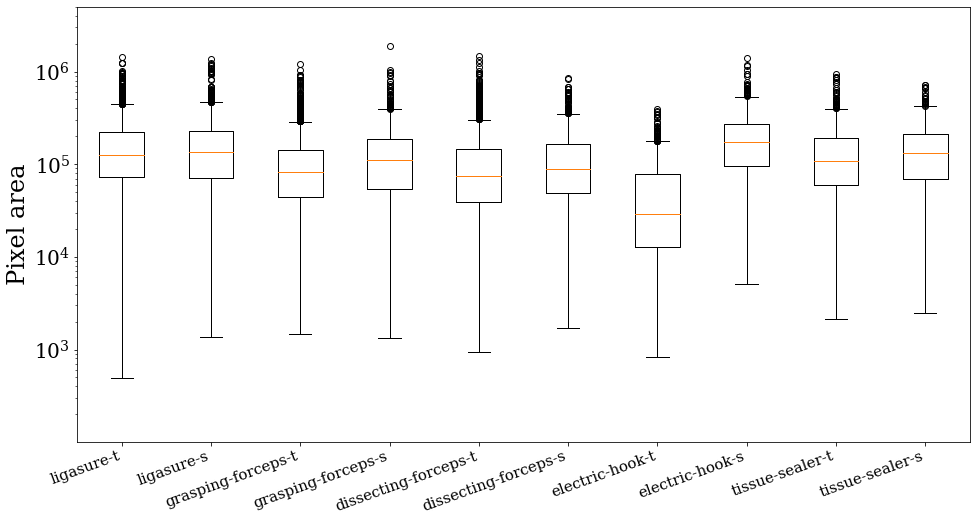

In [231]:
plt.figure(figsize=(16,8))
labels = 'ligasure-t', 'ligasure-s', 'grasping-forceps-t', 'grasping-forceps-s', 'dissecting-forceps-t', 'dissecting-forceps-s', 'electric-hook-t', 'electric-hook-s', 'tissue-sealer-t', 'tissue-sealer-s'
plt.boxplot([pd_rboxes_tool2m_pixels, pd_rboxes_tool2s_pixels, pd_rboxes_tool1m_pixels, pd_rboxes_tool1s_pixels, 
             pd_rboxes_tool3m_pixels,pd_rboxes_tool3s_pixels, pd_rboxes_tool47m_pixels, pd_rboxes_tool47s_pixels,
             pd_rboxes_tool5m_pixels, pd_rboxes_tool5s_pixels], labels=labels)
plt.yscale('log')
plt.xticks(rotation=20, ha='right', size = 15)
plt.yticks(size = 20)
plt.ylim([1.01e2, 5e6])
plt.ylabel('Pixel area', size = 24)
plt.savefig('./dataset/statistics_imgs/tool_pixels.png', dpi=600, pad_inches=0)

In [234]:
pd_rboxes_tool1m.shape, pd_rboxes_tool1s.shape, pd_rboxes_tool2m.shape, pd_rboxes_tool2s.shape

((1489, 9), (1022, 9), (2103, 9), (1417, 9))

In [236]:
pd_rboxes_tool3m.shape, pd_rboxes_tool3s.shape, pd_rboxes_tool47m_pixels.shape, pd_rboxes_tool47s_pixels.shape

((1558, 9), (1019, 9), (715,), (640,))

In [237]:
pd_rboxes_tool5m.shape, pd_rboxes_tool5s.shape

((750, 9), (600, 9))

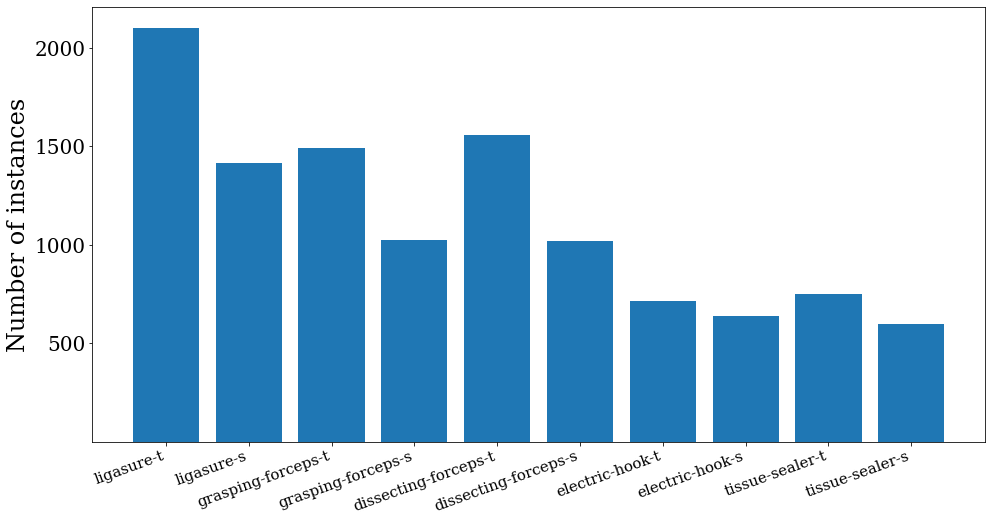

In [251]:
plt.figure(figsize=(16,8))
labels = ['ligasure-t', 'ligasure-s', 'grasping-forceps-t', 'grasping-forceps-s', 'dissecting-forceps-t', 'dissecting-forceps-s', 'electric-hook-t', 'electric-hook-s', 'tissue-sealer-t', 'tissue-sealer-s']
plt.bar(labels, [pd_rboxes_tool2m_pixels.shape[0], pd_rboxes_tool2s_pixels.shape[0], pd_rboxes_tool1m_pixels.shape[0], pd_rboxes_tool1s_pixels.shape[0], 
        pd_rboxes_tool3m_pixels.shape[0],pd_rboxes_tool3s_pixels.shape[0], pd_rboxes_tool47m_pixels.shape[0], pd_rboxes_tool47s_pixels.shape[0],
        pd_rboxes_tool5m_pixels.shape[0], pd_rboxes_tool5s_pixels.shape[0]])
plt.xticks(rotation=20, ha='right', size = 15)
plt.yticks(np.arange(500, 2400, 500), size = 20)
# plt.ylim([1.01e2, 5e6])
plt.ylabel('Number of instances', size = 24)
plt.savefig('./dataset/statistics_imgs/tool_instances_num.png', dpi=600, pad_inches=0)

In [239]:
[pd_rboxes_tool2m_pixels.shape[0], pd_rboxes_tool2s_pixels.shape[0], pd_rboxes_tool1m_pixels.shape[0], pd_rboxes_tool1s_pixels.shape[0], 
             pd_rboxes_tool3m_pixels.shape[0],pd_rboxes_tool3s_pixels.shape[0], pd_rboxes_tool47m_pixels.shape[0], pd_rboxes_tool47s_pixels.shape[0],
             pd_rboxes_tool5m_pixels.shape[0], pd_rboxes_tool5s_pixels.shape[0]]

[2103, 1417, 1489, 1022, 1558, 1019, 715, 640, 750, 600]

In [263]:
import collections

In [261]:
tpleft_cnts = np.array(pd_rboxes['topleft_ind'])

In [264]:
collections.Counter(tpleft_cnts)

Counter({3: 4126, 1: 2128, 0: 1761, 2: 3298})